### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write up, download this file as a PDF or HTML file and submit in the final section of this lesson.


# (1) What is the independent variable? What is the dependent variable?

### Background

*"In [the] Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed"*

[Please click here for referenced information used in background](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True)

**Independent Variable**

* The independent variable is the paradigm (i.e. Congruent or Incongruent).

**Dependent variable**

* The dependent variable is the time in seconds per individual to complete the Stroop task under congruent and incongruent paradigms (performed on independent occasions).  


# (2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

### Null hypothesis:

The null hypothesis states that the population parameters of the Stroop scores are equal under both congruent and incongruent paradigms.

* $H_{0}$: $μ_{Congruent}$ =  $ μ_{Incongruent}$

### Alternative hypothesis:

The alternative hypothesis states that the population parameters of the Stroop scores are not equal when comparing congruent and incongruent paradigms.

* $H_1$: $μ_{Congruent}$ $\neq$ $μ_{Incongruent}$


### Statistical test
* To test if the alternative hypothesis is true, I will use mixed linear regression (this considers dependency and is used regularly with longitudinal data, for example from a clinical trial. In fact, paired Students t-test is a simple form of mixed linear regression/ANCOVA). 


### Glossary
* $H_{0}$ : null hypothesis,
* $H_1$ :alternative hypothesis.
* μ: population mean for the Stroop scores obtained either under congruent or incongruent paradigms.

# (3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [23]:
#import modules,libraries,dataframe, and view first 5 files in dataframe
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline
sns.set_style('white')
df= pd.read_csv("stroopdata.csv")
df.head(2)

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741


In [3]:
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


#### The average Stroop scores and standard deviations are as follows:

Congruent paradigm: 14.05 (±3.56) seconds

Incongruent paradigm: 22.02 (±4.80) seconds



# (4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

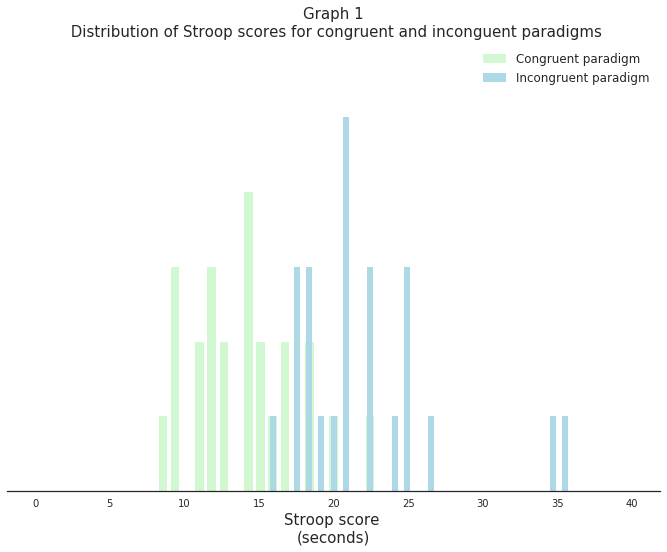

In [24]:
# Below is the code for a histogram output, relying on the matplotlib.axes.Axes.hist function
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
data = df['Congruent']
data2 = df["Incongruent"]
bins = np.linspace(0, 40, endpoint=True)
ax.hist(data, bins, alpha=0.4, rwidth=0.7, color="lightgreen", label='Congruent paradigm')
ax.hist(data2, bins, alpha=1.0, rwidth=0.5, color="lightblue", label='Incongruent paradigm')
ax.set_ylim([0, 6.0])
ax.set_title("Graph 1\n Distribution of Stroop scores for congruent and inconguent paradigms", fontsize= 15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_xlabel("Stroop score \n(seconds)", fontsize=15)
ax.set_yticklabels([])
plt.legend(fontsize=11.9)
plt.show();

In Graph 1, we observe the distribution of the Stroop scores obtained relative to the paradigm used (i.e. Congruent [ lightgreen ], vs incongruent [ lightblue ]). Lower scores indicate that the participant took less time to complete the task. Participants under congruent paradigms requiered less time to complete the task, in comparison to scores obtained uner the incongruent paradigm. Most particpants under the congruent paradigm scored around 15 seconds, while under the incongruent paradigm scored just above 20 seconds. There are 2 outlier scores near 35 seconds in the incongruent paradigm (there were no outlier scores in the congruent paradigm) [ this is a visual analysis ].

# (5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

In [25]:
# I pivoted the table in stata and will run a linear mixed effects model in python 3.
# I am looking at pre- post- scores (i.e. Congruent-pre, Incongruent-post)
# 0 refers to the Congruent paradigm and 1 refers to the incongruent paradigm in the paradigm column.
# VAS refers to the Stroop score in seconds.
# index is the participant identification.
df1= pd.read_csv("stroopdata_pivot.csv")
df1.head() # used to preview the data after the pivot

,index,paradigm,vas
0,1,0,12.079
1,1,1,19.278
2,2,0,16.791
3,2,1,18.741
4,3,0,9.564


## Supporting material for mixed linear model

### Linear mixed effects model

*"Linear Mixed Effects models are used for **regression analyses involving dependent data**. Such data arise when working with **longitudinal** and other study designs in which **multiple observations are made on each subject**. [...]"*

[Please click here for referenced information from statsmodel documentation ](http://www.statsmodels.org/dev/mixed_linear.html)

In [17]:
import statsmodels.formula.api as smf
md = smf.mixedlm("vas ~ paradigm", df1, groups=df1["index"])
mdf = md.fit()
print(mdf.summary());

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: vas      
No. Observations: 48      Method:             REML     
No. Groups:       24      Scale:              11.8333  
Min. group size:  2       Likelihood:         -133.3391
Max. group size:  2       Converged:          Yes      
Mean group size:  2.0                                  
-------------------------------------------------------
             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept    14.051    0.862 16.297 0.000 12.361 15.741
paradigm      7.965    0.993  8.021 0.000  6.018  9.911
groups RE     6.007    1.446                           



The mixed linear regression model indicates that there is a significant difference between performing the Stroop test under congruent vs. incongruent paradigms.  In fact according to the model, a subject is likely to score up to 7.965 seconds more seconds during the incongruent paradigm, relative to the congruent paradigm. 

Summarized statistics for:
z value= 8.021, p value: 0.000, beta coeficient: 7.965, 95% CI: 6.018-9.911

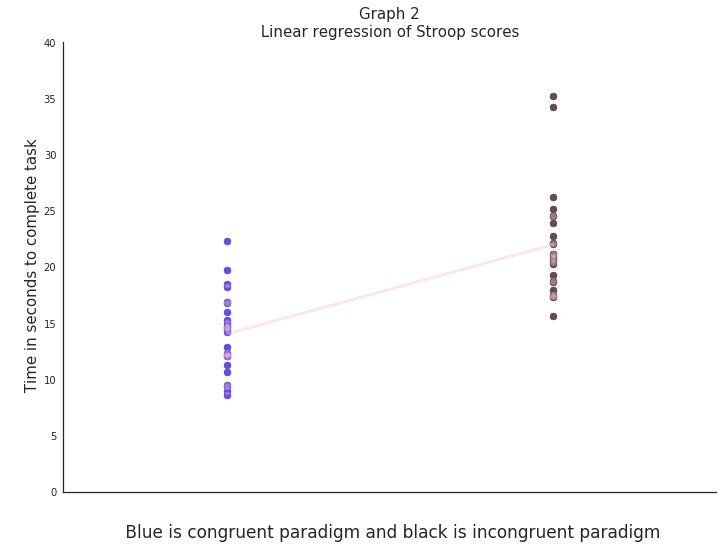

In [7]:
#To assist in the interpretation of the OLS regression above
#Below is a linear regression graph with its respective scatter plot data
#Linear regression plot
x= df1['paradigm']
y= df1['vas']
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
m,b = np.polyfit(x, y, 1)
fit = np.polyfit(x,y,1)
fit_fn = np.poly1d(fit) 
plt.plot(x,y, 'yo', x, fit_fn(x), '--k', color="pink", alpha=0.4, label="Lnear regression")
plt.xlim(-0.5, 1.5)
plt.ylim(0, 40)
plt.ylabel('\n Time in seconds to complete task', fontsize= 15)
plt.xlabel(' \n Blue is congruent paradigm and black is incongruent paradigm', fontsize=17)
#Scatter plot of congruent paradigm scores superimposed
df2=pd.read_csv("stroopdata_group0.csv") 
x0=df2['Group']
y0=df2['Congruent']
plt.scatter(x0, y0, color="blue", alpha=1.0, label='Congruent paradigm')
#Scatter plot of incongruent paradigm scores superimposed
df3=pd.read_csv("stroopdata_group1.csv") 
x1=df3['Group']
y1=df3['Incongruent']
plt.scatter(x1, y1, color="black", alpha=1.0, label='Incongruent paradigm')
#axis removal
ax.set_xticklabels([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
#plot label and graphs
ax.set_title("Graph 2\n Linear regression of Stroop scores ", fontsize= 15)
plt.show();

# (6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

The dorsolateral prefrontal cortex needs more time to process information prior to committing to a decision rather than recalling automatically stored data.